In [1]:
import li
from lithium.li import EvaluationHelpers

import os
import numpy as np
import matplotlib.pyplot as plt


# Data Loading and Definition of Variables

In [2]:
# path to images
images_set = "A_PropagatingWave_2"

path_dir = "Z:/Archiv/2D/Experiment/2025/20250121/Images20250121/" + images_set + "/"
path_file = os.listdir(path_dir)

print(len(path_file))

730


In [3]:
# grab loop variable names
variables = li.loop_variables(path_dir + path_file[0])[1]
var_vals = li.loop_variables(path_dir + path_file[0])[0]

In [4]:
print(variables)
print(var_vals)

['i', 'Img_State', 'TOF']
[array([1., 2., 3., 4., 5.]), array([1., 2.]), array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])]


In [5]:
# experiment variables loaded from experiment control
info = li.GetImageMetadata(path_dir + path_file[0])
info_sorted = dict(sorted(info[0].items(), key=lambda x: x[0].lower()))
# info_sorted

# Image Processing

In [6]:
%%time
# create initial dictionary with all raw images
images_raw = EvaluationHelpers.createImageInfoList([path_dir], variables)

CPU times: total: 0 ns
Wall time: 74.5 ms


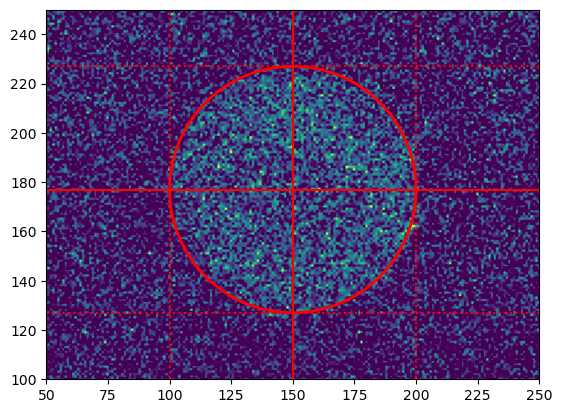

In [46]:
# determine optimal ROI
center = (177, 150)
h = 50
w = 50

single_prc = li.density_builder([images_raw[32]], variables, center, h, w, info_sorted["Csat"], info_sorted["Img_Illumination_Time"], progress_disable = True)

plt.imshow(single_prc.iloc[0]["density"].data, vmin = 0, vmax = 3, cmap = "viridis")

circle = plt.Circle((center[1], center[0]), 50, color='r', fill=False, lw = 2)
plt.gca().add_artist(circle)

plt.xlim(50, 250)
plt.ylim(100, 250)


plt.axhline(center[0], c = "red")
plt.axhline(center[0] - h, c = "red", ls = ":")
plt.axhline(center[0] + h, c = "red", ls = ":")

plt.axvline(center[1], c = "red")
plt.axvline(center[1] - w, c = "red", ls = ":")
plt.axvline(center[1] + w, c = "red", ls = ":")


plt.show()

In [14]:
|%%time
# calculate all density images and apply mask
images_prc = li.density_builder(images_raw, variables, center, h, w, info_sorted["Csat"], info_sorted["Img_Illumination_Time"], progress_disable = False)

|████████████████████████████████████████| 146/146 [100%] in 17.4s (8.39/s)     
CPU times: total: 6.08 s
Wall time: 17.4 s


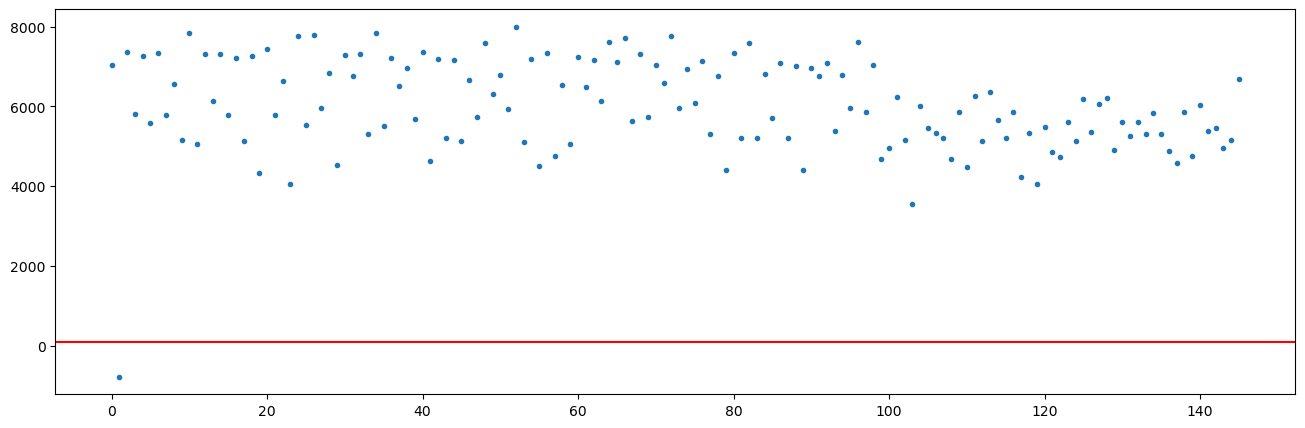

In [15]:
# filter out missed shots
bol = []

for var in var_vals[2]:

    for i, im in images_prc[images_prc["TOF"] == var].iterrows():
        bol.append(np.sum(im["density"].compressed()))

plt.figure(figsize = (16, 5))

plt.plot(bol, ".")
plt.axhline(100, c = "r")

plt.ylim(None, None)

plt.show()

In [16]:
%%time
# filter missed shots
images_fil = li.filter(images_prc, 100)

CPU times: total: 62.5 ms
Wall time: 165 ms


In [17]:
%%time
# group by loop variables and average over iterations
images_grp = li.group(images_fil, variables, "i")

CPU times: total: 500 ms
Wall time: 577 ms


In [18]:
images_grp

,Img_State,TOF,density
0,1.0,0.000,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
1,1.0,0.001,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
2,1.0,0.002,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
3,1.0,0.003,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
4,1.0,0.004,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
5,1.0,0.005,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
6,1.0,0.006,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
7,1.0,0.007,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
8,1.0,0.008,"[[--, --, --, --, --, --, --, --, --, --, --, ..."
9,1.0,0.009,"[[--, --, --, --, --, --, --, --, --, --, --, ..."


# Visualization

n1 - n2, TOF: 0.0 s


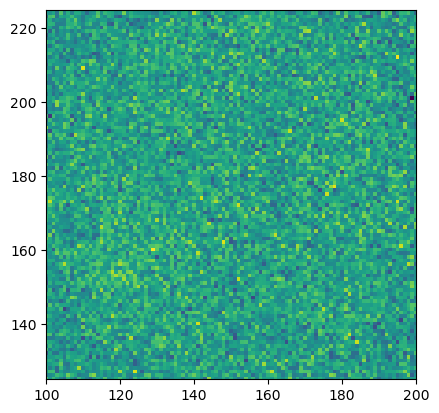


n1 - n2, TOF: 0.001 s


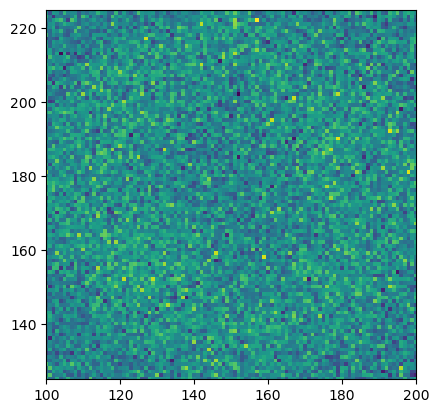


n1 - n2, TOF: 0.002 s


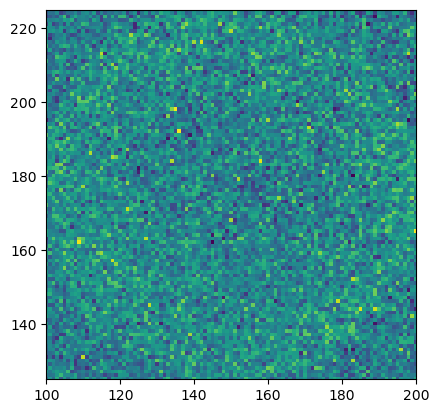


n1 - n2, TOF: 0.003 s


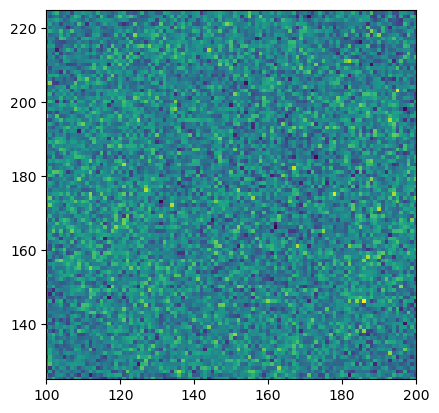


n1 - n2, TOF: 0.004 s


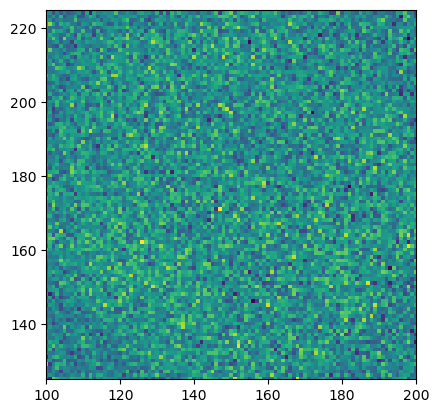


n1 - n2, TOF: 0.005 s


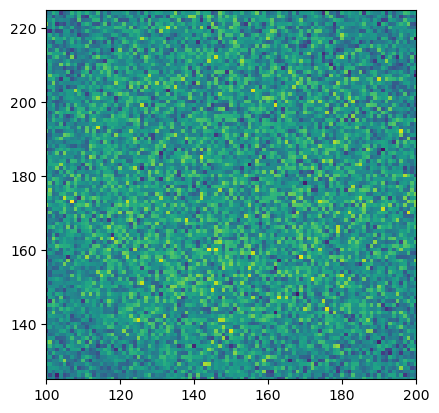


n1 - n2, TOF: 0.006 s


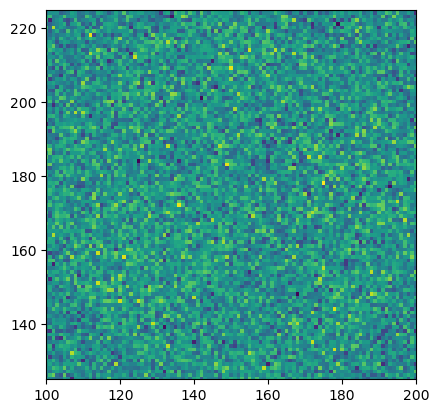


n1 - n2, TOF: 0.007 s


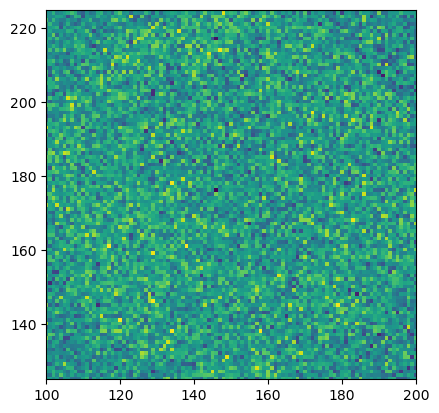


n1 - n2, TOF: 0.008 s


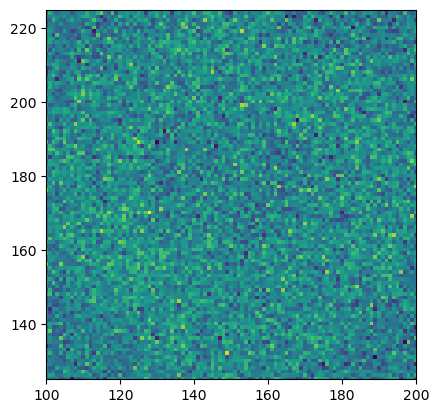


n1 - n2, TOF: 0.009 s


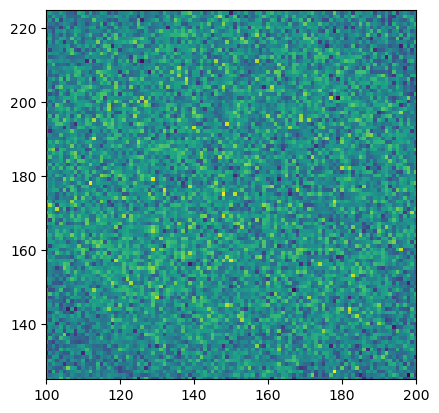

In [34]:
length = len(images_grp)//2

for i in range(length):

    # state 1
    # print("n1")
    # plt.imshow(images_grp["density"].iloc[i])
    # plt.xlim(center[1] - w, center[1] + w)
    # plt.ylim(center[0] - h, center[0] + h)
    # plt.show()

    # state 2
    # print("n2")
    # plt.imshow(images_grp["density"].iloc[length + i])
    # plt.xlim(center[1] - w, center[1] + w)
    # plt.ylim(center[0] - h, center[0] + h)
    # plt.show()

    # difference
    print(f"n1 - n2, TOF: {images_grp["TOF"].iloc[i]} s")
    plt.imshow(images_grp["density"].iloc[i] - images_grp["density"].iloc[length + i])
    plt.xlim(center[1] - w, center[1] + w)
    plt.ylim(center[0] - h, center[0] + h)
    plt.show()

    print("")

In [16]:
# heat = images_res.pivot(index="Acc_heat_freq", columns="RF23_Sweep_Rate", values="response")
# heat_run = images_res.pivot(index="Acc_heat_freq", columns="RF23_Sweep_Rate", values="response_run")
#
# plt.plot(heat[70], ".")
# plt.plot(heat_run[70], ".")
#
# plt.ylim(None, 2)
#
# plt.show()